In [5]:
# Loading the dataset
from dataset import PersonDataset
from torch.utils.data import random_split, DataLoader
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [6]:
root_dir = '/media/enrique/Extreme SSD/person'
sequence_list = [f'person-{i}' for i in range(1, 21)]
sequence_list = ["person-10"]
dataset = PersonDataset(root_dir=root_dir, sequence_list=sequence_list, img_transform_size=(640, 640), template_transform_size=(256, 256), max_num_templates=10, max_detections = 300)

batch_size = 2
# Optionally, create DataLoader objects for the training and validation sets
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [7]:

def visualize_batch_data_sample(data_sample):
    # Extract the batch of images, bounding boxes, and original dimensions
    imgs = data_sample["img"]  # Batch of images (B, C, H, W)
    bounding_boxes = data_sample["bounding_boxes"]  # Batch of bounding boxes (B, N, 4)
    orig_dims = data_sample["orig_dim"]  # Batch of original image dimensions (B, 2)

    batch_size = imgs.shape[0]  # Get the batch size

    for i in range(batch_size):
        # Extract the image, bounding boxes, and original dimensions for the i-th sample
        img = imgs[i].permute(1, 2, 0).detach().cpu().numpy()  # Convert from PyTorch tensor to NumPy and swap channels (H, W, C)
        img = (img * 255).astype("uint8").copy()  # Denormalize image if it's normalized to [0, 1]
        orig_h, orig_w = orig_dims  # Get the original height and width of the i-th image

        # Resize the image to the original dimensions
        img = cv2.resize(img, (orig_w[i].item(), orig_h[i].item()))

        target = True

        # Loop over each bounding box for the i-th image
        for j in range(bounding_boxes[i].shape[0]):
            # Bounding box format: (x_center, y_center, width, height) with unit scaling
            x_center, y_center, w, h = bounding_boxes[i, j]

            # Rescale the bounding box to the original image dimensions
            x_center = x_center * orig_w[i]
            y_center = y_center * orig_h[i]
            w = w * orig_w[i]
            h = h * orig_h[i]

            # Calculate the top-left and bottom-right corners of the bounding box
            x1 = int(x_center - w / 2)
            y1 = int(y_center - h / 2)
            x2 = int(x_center + w / 2)
            y2 = int(y_center + h / 2)

            # Draw the bounding box on the image using OpenCV (red color, thickness=2)
            if target:
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
                target = False
            else:
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

        # Display the image with bounding boxes using Matplotlib
        plt.figure(figsize=(8, 8))
        plt.imshow(img)  # Convert BGR (OpenCV format) to RGB for Matplotlib
        plt.axis("off")  # Hide axes
        plt.show()


tensor([[[0.4992, 0.3056, 0.0898, 0.3111],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.5445, 0.3593, 0.1219, 0.4815],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000]]])
Number bboxes tensor([1, 1])


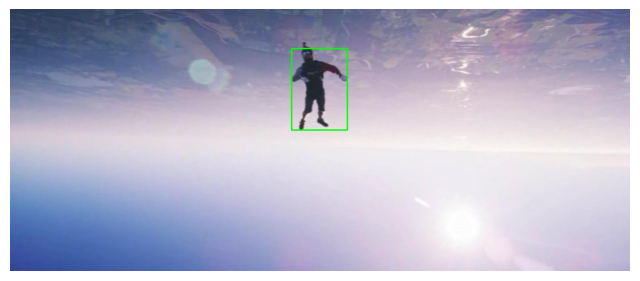

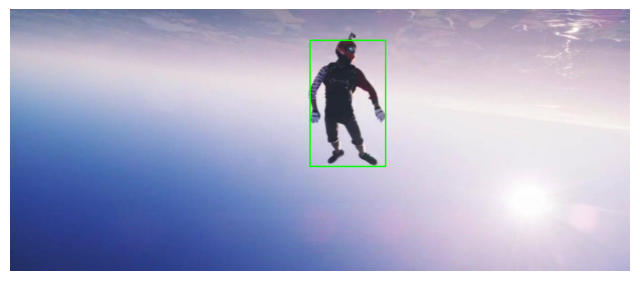

In [8]:
# Example usage with your DataLoader
# Assume your DataLoader is already defined as `dataloader`
# Get a sample from the DataLoader
data_sample = next(iter(data_loader))

print(data_sample["bounding_boxes"])

print("Number bboxes", data_sample["num_boxes"])
# Visualize the data sample
visualize_batch_data_sample(data_sample)

batch_size 2
num_templates 10


/usr/lib/python3/dist-packages/matplotlib/cm.py:440: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


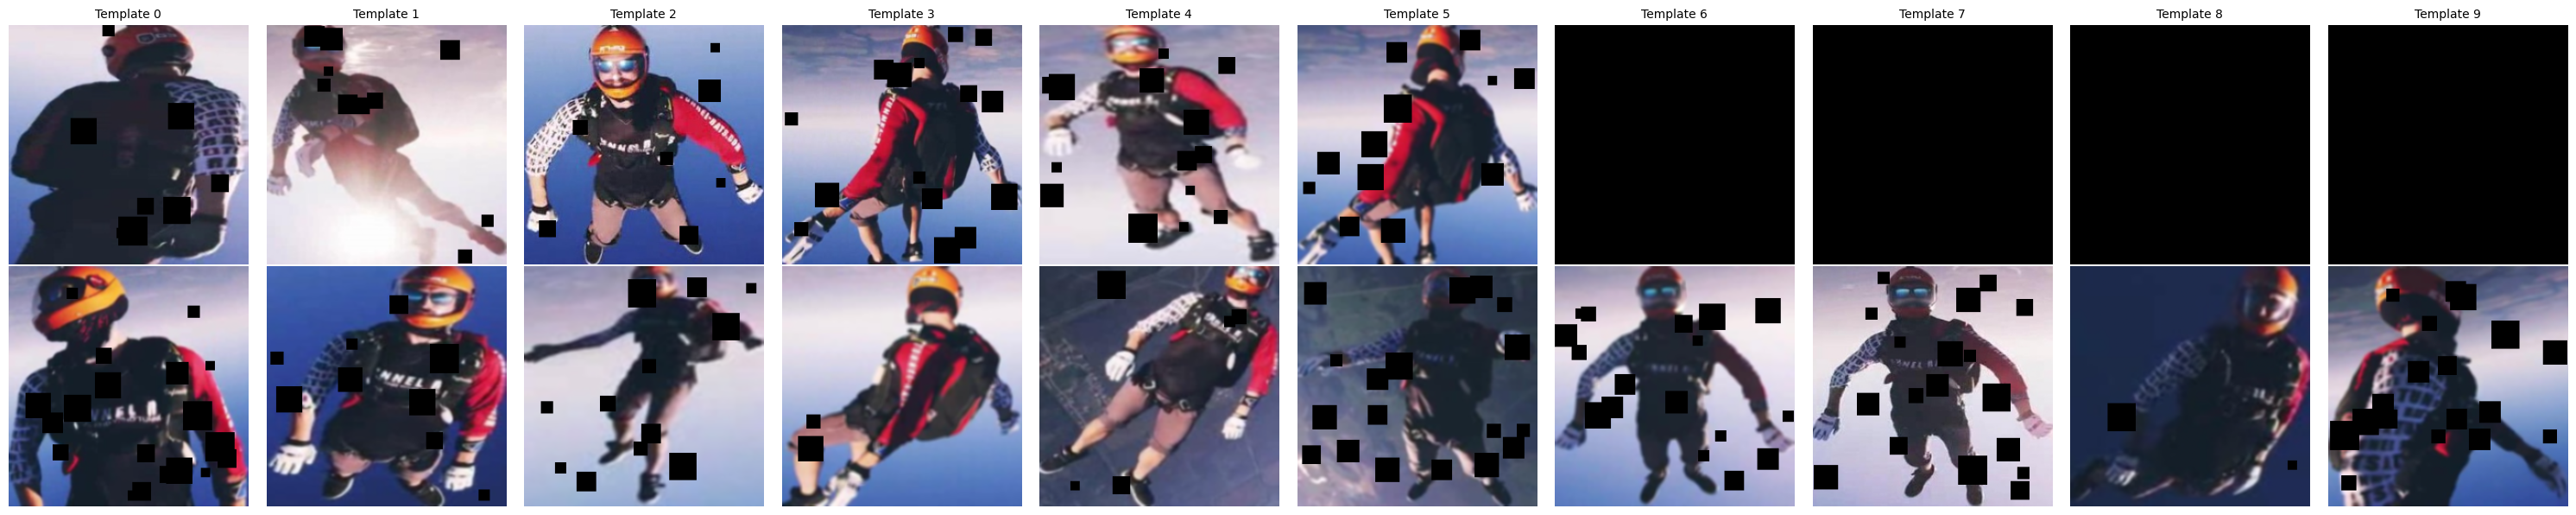

In [9]:

templates_tensor = data_sample["templates"]
batch_size = templates_tensor.shape[0]
num_templates = templates_tensor.shape[1]

print("batch_size", batch_size)
print("num_templates", num_templates)

# Create a figure with multiple subplots: rows = batch_size, cols = num_templates
fig, axs = plt.subplots(batch_size, num_templates, figsize=(num_templates * 3, batch_size * 3))

# Loop over the batches and templates
for i in range(batch_size):
    for j in range(num_templates):

        # Extract the corresponding template image from the tensor
        img_tensor = templates_tensor[i, j]

        # Permute to [width, height, channels] for matplotlib if it's RGB
        img_tensor = img_tensor.permute(1, 2, 0)

        # Normalize the image tensor for better visualization
        img_tensor = (img_tensor - img_tensor.min()) / (img_tensor.max() - img_tensor.min())

        # Plot the image on the subplot (i-th row, j-th column)
        axs[i, j].imshow(img_tensor)
        axs[i, j].axis('off')  # Remove the axis for a cleaner look

        # Set titles for rows and columns
        if i == 0:
            axs[i, j].set_title(f'Template {j}', fontsize=10)
        if j == 0:
            axs[i, j].set_ylabel(f'Batch {i}', fontsize=10)

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

In [10]:
# for epoch in range(10):
#     for batch in data_loader:

#         for i in range(len(batch["img"])):
#             print(batch["img_path"][i])
#             print(batch["orig_dim"][i])
#             print(batch["bounding_boxes"][i][:batch['num_boxes'], :])